# ACnD 2. 稳定性 (Stability)

对于一个简单系统 $\dot{x} = Ax$ 的来说，要判断其是否稳定，就需要得到系统状态关于时间的方程:

$$x(t) = e^{At}x(0)$$

而该方程中参数 $e^{At}$ 直接计算非常复杂：

$$e^{At} = I + At + \frac{A^2t^2}{2!} + \frac{A^3t^3}{3!} + ...$$

但，如果我们对 A 矩阵做特征向量变换，则会相对好计算一些。

## 1. 特征值和特征向量 (Eigen Value and Eigen Vector)

### 1.1 概念解释

特征向量和特征值是共生关系，他们有一个简单的性质：

$$
A\vec{v} = \lambda\vec{v}
$$

即如下图所示，一个矩阵乘以其特征向量 $\vec{v}$ 后，会得到一个与其特征向量方向相同的向量 $\lambda\vec{v}$。特征值 $\lambda$ 为该向量是缩放倍数。

![特征值和特征向量](./pics/Eigen.png)

在本节中，我们称特征向量矩阵为: $T$，特征值矩阵为 $D$

$$
T = \begin{bmatrix}
    \vec{v_1} & \vec{v_2} & ... & \vec{v_n}
\end{bmatrix}
$$

$$
D = \begin{bmatrix}
    \lambda_{1} & 0  & \cdots   & 0   \\
    0 & \lambda_{2}  & \cdots   & 0  \\
    \vdots & \vdots  & \ddots   & \vdots  \\
    0 & 0  & \cdots\  & \lambda_{n}  \\
    \end{bmatrix}
$$

T 和 D 的关系可以写为：

$$
\begin{aligned}
AT &=TD\\
T^{-1}AT &= D
\end{aligned}
$$

### 1.2 在控制系统中的用处

为了方便计算系统的稳定性，我们对系统状态量 x 进行线性变换，转换到以其特征向量为基的空间。其变化过程的推导为：

$$
\begin{aligned}
    x &= Tz\\
    \dot{x} &= T\dot{z} = Ax\\
    T\dot{z} &= ATz\\
    \dot{z} &= T^{-1}ATz\\
    \dot{z} &= Dz
\end{aligned}
$$

由此，我们便得到了一个容易计算的公式：

$$
\boxed{\dot{z} = Dz}
$$

### 1.3 Matlab 函数

假设我们有一个矩阵 A：

$$
A= \begin{bmatrix}
    1 & -1\\
    3 & 4
\end{bmatrix}
$$

我要计算其特征值和特征向量只需要使用方程 `eig( )` 即可：

In [2]:
A = [1 -1; 3 4];
[T,D] = eig(A)


T =

  -0.4330 + 0.2500i  -0.4330 - 0.2500i
   0.8660 + 0.0000i   0.8660 + 0.0000i


D =

   2.5000 + 0.8660i   0.0000 + 0.0000i
   0.0000 + 0.0000i   2.5000 - 0.8660i




## 2. 系统的稳定性

### 2.1 系统状态表达式

通过将 x 转换成 z 后，计算系统状态关于时间的函数便容易很多：

$$
z(t) = e^{Dt}z(0)
\begin{bmatrix}
    e^{\lambda_{1}t} & 0  & \cdots   & 0   \\
    0 & e^{\lambda_{2}t}  & \cdots   & 0  \\
    \vdots & \vdots  & \ddots   & \vdots  \\
    0 & 0  & \cdots\  & e^{\lambda_{n}t}  \\
\end{bmatrix}
z(0)
$$

其中 $\lambda$ 是一个复数，即：

$$
\lambda = a + bi
$$

如果我们想要系统的原始状态量方程 $x(t)$ 的话，也非常容易：

$$
x(t) = Te^{Dt}T^{-1}x(0) 
$$

$$
x(t) = Te^{Dt}z(0)
$$

### 2.2 稳定与不稳定

从系统状态表达式中，我们可以看出，系统的状态是与指数 e 的级数相关的。当时间趋于无穷的时候，假如 $\lambda$ 的实部 $a>0$，$x( \infty )\rightarrow \infty$。对于这样的系统，我们就称其为不稳定的系统。而当 $a<0$ 是时候 $x( \infty )\rightarrow constant$。系统最终会稳定一个状态不再发生改变。

![系统的稳定与不稳定](./pics/stable.png)

> 上图中的坐标系为复数坐标系，横轴为实轴(Re)，纵轴为虚轴(Im)

在复数坐标系，如果 $\lambda$ 在左半侧，系统稳定，右半侧不稳定。

从状态方程（暂时不考虑输入） $\dot{x} = Ax$ 的角度来看。我们可以画出下面几种类型的相图(Phase diagram) 来看系统的稳定与否

其中：$x_2 = \frac{dx_1}{dt}$

![ ](./pics/phase1.png)

![相图类型](./pics/phase2.png)



### 2.3 离散时间表达式 (Discrete time expression)

之前的所有表达式都是基于连续时间写出来的。而在离散时间（计算系统）中，我们的系统表达式为：

$$
x_{k+1} = \tilde{A}x_k\qquad x_k = x(k\Delta t)
$$

$$
\tilde{A} = e^{A\Delta t}
$$

由此可得系统状态随时间变化的表达式为：

$$
\begin{aligned}
x_1 &= \tilde{A}^1 x_0 \\   
x_2 &= \tilde{A}^2 x_0  \\  
\vdots\\
x_N &= \tilde{A}^N x_0    \\
\end{aligned}
$$

当 $t=N, N\rightarrow \infty$ 的时候，$x_N \propto \lambda ^N$ 。

这时，我们用欧拉方程可以得到：

$$\lambda = Re^{i\theta}$$

![欧拉角](./pics/euler.png)

则：

$$\lambda^N = R^Ne^{Ni\theta}$$


这里的 $e^{Ni\theta}$ 只会改变向量的角度。而$R^N$ 则会改变 $\lambda$ 的大小。因此，要想使得系统稳定，则需要使得 $R<1$。

![离散系统的稳定性图](./pics/Stable-and-unstable-regions-for-pole-locations-in-the-z-plane.png)

## 3. Matlab 

在 Matlab 中也可以使用 `pzmap( )` 画出动态系统的极点和零点图，比如：


H =
 
  2 s^2 + 5 s + 1
  ---------------
   s^2 + 3 s + 5
 
Continuous-time transfer function.




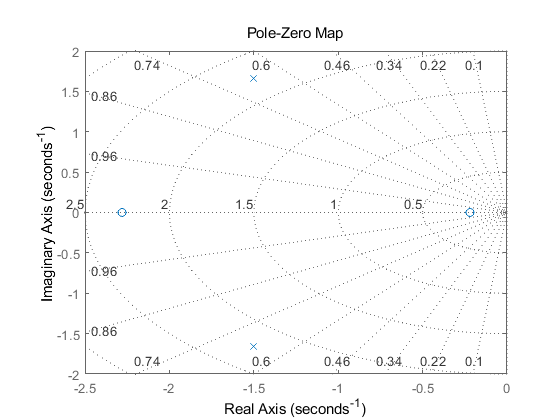

In [3]:
H = tf([2 5 1],[1 3 5])
pzmap(H)
grid on

- 上篇：[ACnD 1. 状态空间 -- 练习](https://zhuanlan.zhihu.com/p/467039497)
- 下篇：[]()